# Unit 5 - Financial Planning


In [171]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [172]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [173]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2 
my_eth=5.3
#btc_data=[]
#eth_data=[]

In [174]:
# Crypto API URLs 
# Changed from CAD to USD 
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [175]:
btc_data=requests.get(btc_url).json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18611668, 'total_supply': 18611668, 'max_supply': 21000000, 'quotes': {'USD': {'price': 31585.0, 'volume_24h': 43881032737, 'market_cap': 587841407332, 'percentage_change_1h': -1.03578185989911, 'percentage_change_24h': -1.02205764559117, 'percentage_change_7d': -12.5199211593517, 'percent_change_1h': -1.03578185989911, 'percent_change_24h': -1.02205764559117, 'percent_change_7d': -12.5199211593517}}, 'last_updated': 1611736695}}, 'metadata': {'timestamp': 1611736695, 'num_cryptocurrencies': 1371, 'error': None}}


In [176]:
eth_data=requests.get(eth_url).json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 114421603, 'total_supply': 114421603, 'max_supply': 0, 'quotes': {'USD': {'price': 1282.06, 'volume_24h': 36359376027, 'market_cap': 147582473206, 'percentage_change_1h': -1.9566408071313, 'percentage_change_24h': -3.68893560181895, 'percentage_change_7d': -7.33099925714497, 'percent_change_1h': -1.9566408071313, 'percent_change_24h': -3.68893560181895, 'percent_change_7d': -7.33099925714497}}, 'last_updated': 1611736788}}, 'metadata': {'timestamp': 1611736788, 'num_cryptocurrencies': 1371, 'error': None}}


In [177]:
import json

In [178]:
print(json.dumps(btc_data,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18611668,
            "total_supply": 18611668,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 31585.0,
                    "volume_24h": 43881032737,
                    "market_cap": 587841407332,
                    "percentage_change_1h": -1.03578185989911,
                    "percentage_change_24h": -1.02205764559117,
                    "percentage_change_7d": -12.5199211593517,
                    "percent_change_1h": -1.03578185989911,
                    "percent_change_24h": -1.02205764559117,
                    "percent_change_7d": -12.5199211593517
                }
            },
            "last_updated": 1611736695
        }
    },
    "metadata": {
        "timestamp": 1611736695,
        "num_cry

In [179]:
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114421603,
            "total_supply": 114421603,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1282.06,
                    "volume_24h": 36359376027,
                    "market_cap": 147582473206,
                    "percentage_change_1h": -1.9566408071313,
                    "percentage_change_24h": -3.68893560181895,
                    "percentage_change_7d": -7.33099925714497,
                    "percent_change_1h": -1.9566408071313,
                    "percent_change_24h": -3.68893560181895,
                    "percent_change_7d": -7.33099925714497
                }
            },
            "last_updated": 1611736788
        }
    },
    "metadata": {
        "timestamp": 1611736788,
        "num_cr

In [180]:
# Fetch current BTC price
btc_price= btc_data["data"]["1"]["quotes"]["USD"]['price']
btc_price

31585.0

In [181]:
# Fetch current ETH price
eth_price= eth_data["data"]["1027"]["quotes"]["USD"]['price']
eth_price

1282.06

In [228]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price= btc_data["data"]["1"]["quotes"]["USD"]['price']
# Fetch current ETH price
# YOUR CODE HERE!]
eth_price= eth_data["data"]["1027"]["quotes"]["USD"]['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37902.00
The current value of your 5.3 ETH is $6794.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [220]:
# Current amount of shares
# YOUR CODE HERE!
#my_spy=50
#my_agg=200
shares_data = {
    "shares": [200, 50]
}
# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)
# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [221]:
import dotenv

In [222]:
load_dotenv()

True

In [187]:
# Set Alpaca API key and secret
alpaca_api_key=""
alpaca_secret_key=""
# YOUR CODE HERE!
#alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_key=os.getenv("AlPACA_API_KEY")
#alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")
#api = tradeapi.REST('<key_id>', '<secret_key>')
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
#print(f"Alpaca Key type: {type(alpaca_api_key)}")
#print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

In [223]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-01-24", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head(10)

AGG                                     SPY  \
                             open    high     low  close   volume    open   
time                                                                        
2020-01-24 00:00:00-05:00  113.68  113.89  113.67  113.8  4588656  332.44   

                                                              
                             high     low   close     volume  
time                                                          
2020-01-24 00:00:00-05:00  332.53  327.36  328.75  142968802

In [219]:
# Fetch the current closing prices from the DataFrame
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])
print(agg_price)
print(spy_price)

113.8
328.75


In [224]:
# Compute the current value in dollars of the stock portfolio
agg_value = agg_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_price * df_shares.loc["SPY"]["shares"]

In [225]:
# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")

The current value of the 200 AGG shares is $22760.00
The current value of the 50 SPY shares is $16437.50


In [212]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
#df_closing_prices = pd.DataFrame()
# Fetch the closing prices of AGG and SPY
#df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
#df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
#agg_close_price=df_closing_prices["AGG"]
#spy_close_price=df_closing_prices["SPY"]
# Print AGG and SPY close prices
#print(f"Current AGG closing price: ${agg_close_price}")
#print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2020-01-24 00:00:00-05:00    113.8
Name: AGG, dtype: float64
Current SPY closing price: $time
2020-01-24 00:00:00-05:00    328.75
Name: SPY, dtype: float64


In [213]:
# Compute the current value of shares
# YOUR CODE HERE!
#my_spy_value=my_spy*113.8 #spy_close_price
#my_agg_value=my_agg*328.75 #agg_close_price
# Print current value of share
#print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
#print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5690.00
The current value of your 200 AGG shares is $65750.00


### Savings Health Analysis

In [238]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
crypto_val=my_btc_value+my_eth_value
share_val=agg_value+spy_value
crypto={ 'Amount': crypto_val}
shares={ 'Amount': share_val}
# Create savings DataFrame
# YOUR CODE HERE!
# Set the data for the shares value DataFrame
savings_df=pd.DataFrame([shares,crypto]).rename({0:'Shares',1:'Crypto'})
# Display savings DataFrame
display(savings_df)

,Amount
Shares,39197.500
Crypto,44696.918


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

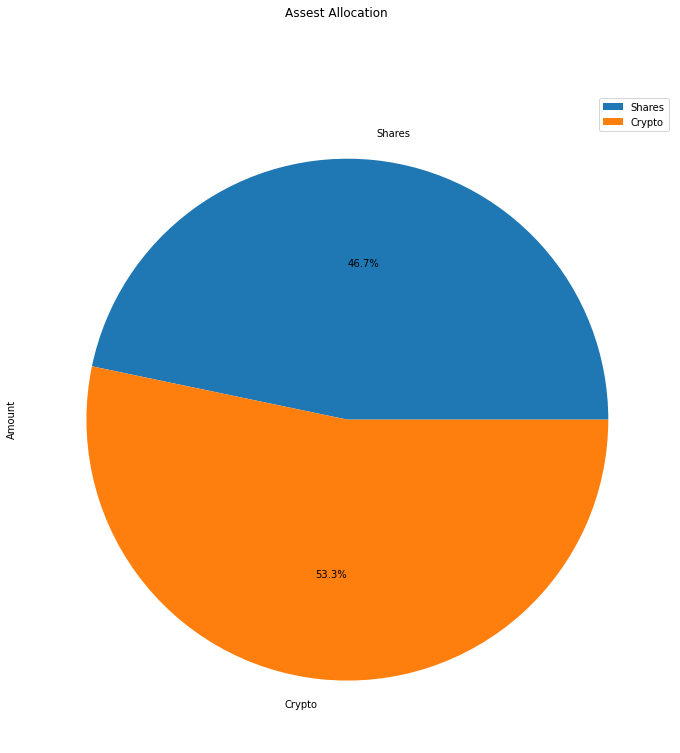

In [240]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_df.plot(kind='pie',
            subplots=True,
            figsize=(12,12),
            title='Assest Allocation',
            autopct='%1.1f%%'
            )

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")